# To Do:
<b> Execution </b>
1. how to strip dbscan clusters from df? --> need to implement within cluster df for each methodology
1. Read all datasets in within single step
2. Make TSNE not read from PCA input
3. Implement Outlier Rule Based Dataset

<b> Details: </b>
1. Remove older info such as census data -etc...
2. remove hard coded tsne/ db scane

# Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# DBSCAN

### Functions

In [45]:
from sklearn.manifold import TSNE

def tsne_(df):
    # grabs only first 3 components
    X = final_log_mm_pca_components.iloc[:, :3].values 

    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])#, c=y, cmap=plt.cm.get_cmap('jet', 10))

    plt.show()
    
    return X_tsne 

import numpy as np
from sklearn.neighbors import NearestNeighbors
def NN(df, num_neighbors):
    # n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
    nbrs = NearestNeighbors(n_neighbors = 5).fit(df)
    # Find the k-neighbors of a point
    neigh_dist, neigh_ind = nbrs.kneighbors(df)
    # sort the neighbor distances (lengths to points) in ascending order
    # axis = 0 represents sort along first axis i.e. sort along row
    sort_neigh_dist = np.sort(neigh_dist, axis = 0)
    
    return sort_neigh_dist, neigh_dist, neigh_ind 

import matplotlib.pyplot as plt
from kneed import KneeLocator
def plot_k(df, neigh_dist):
    k_dist = df[:, 4]    
    kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                          curve = "concave", direction = "increasing", online=True)

    print(kneedle.knee_y)
    kneedle.plot_knee()
    plt.show()
    
    return kneedle.knee_y


from sklearn.cluster import DBSCAN
from collections import Counter
import seaborn as sns
def dbscan_(eps_param, min_samples_param, df):
    clusters = DBSCAN(eps = 3.48, min_samples = 4).fit(df)
    # get cluster labels
    print(clusters.labels_)

    # check unique clusters
    set(clusters.labels_)
    # -1 value represents noisy points could not assigned to any cluster
    
    Counter(clusters.labels_)
    
    tnse_df = pd.DataFrame(data= X_tsne,columns=['t-SNE-1','t-SNE-2']) 

    p = sns.scatterplot(data = tnse_df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
    sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
    plt.show()
    
    return pd.DataFrame(data = clusters.labels_, columns=['label'])

#### T-SNE - final_log_mm_pca_components

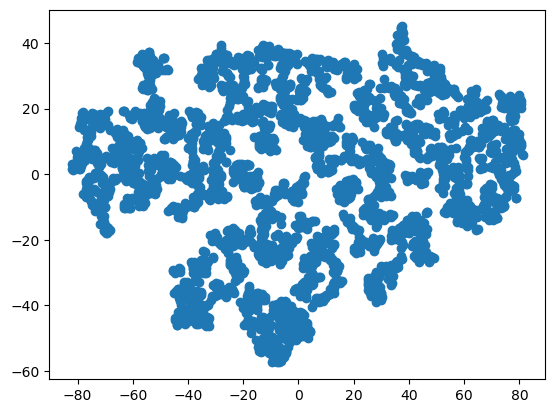

array([[ 21.596287 , -20.662296 ],
       [ 46.00689  , -11.898437 ],
       [-53.93176  ,  19.719254 ],
       ...,
       [ 20.83588  ,  -2.369123 ],
       [  1.3278469,  -6.025722 ],
       [ -1.5826384, -41.8542   ]], dtype=float32)

(array([[0.        , 0.03133426, 0.23342765, 0.43678011, 0.61752871],
        [0.        , 0.03133426, 0.27132574, 0.47642658, 0.64134064],
        [0.        , 0.03727827, 0.27132574, 0.50319425, 0.65323834],
        ...,
        [0.        , 2.32201692, 2.96379492, 3.33707403, 3.58060785],
        [0.        , 2.37566962, 3.14967402, 3.36699202, 3.58509779],
        [0.        , 2.61403638, 3.21812225, 3.39090787, 3.78297001]]),
 array([[0.        , 0.90316032, 1.33191536, 1.5090679 , 1.53793503],
        [0.        , 0.57964806, 0.68388113, 2.71657285, 2.77124015],
        [0.        , 0.76852878, 0.94547439, 1.0265982 , 1.50285901],
        ...,
        [0.        , 0.22991055, 0.96079859, 1.21100966, 1.50412713],
        [0.        , 0.19490352, 1.75449213, 2.16832472, 2.23767746],
        [0.        , 1.0120175 , 1.13919412, 1.27330663, 1.39164307]]),
 array([[   0, 3061, 3032, 3107,  734],
        [   1, 3130, 2770, 1767,  593],
        [   2, 1404, 3045,  516, 1097],
        ..

3.478042152566942


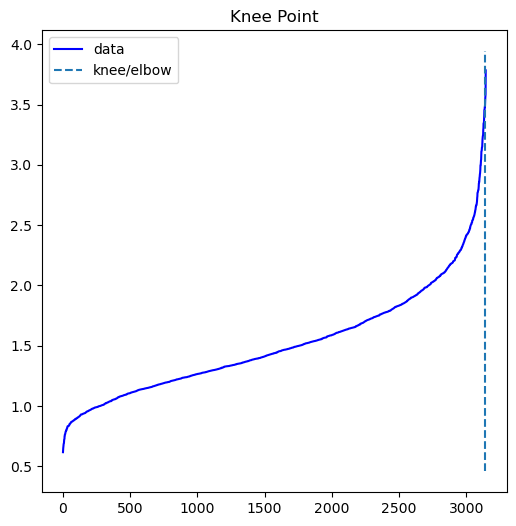

[0 1 2 ... 4 2 5]


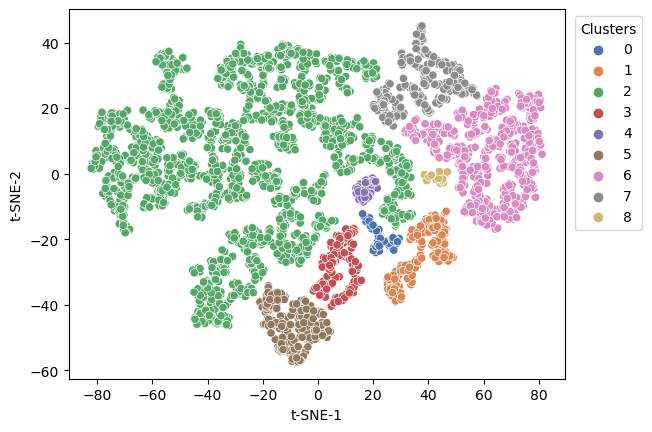

,label
0,0
1,1
2,2
3,2
4,3
...,...
3138,7
3139,6
3140,4
3141,2


In [46]:
# repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

# final_log_mm_pca_components = pd.read_csv(repo_pca + 'final_log_mm_pca_components.csv')

tsne_1_log_mm = tsne_(final_log_mm_pca_components)
display(tsne_1_log_mm)

tsne_2_log_mm = NN(tsne_1_log_mm, 5)
display(tsne_2_log_mm)

tsne_3_log_mm = plot_k(tsne_2_log_mm[0], tsne_2_log_mm[1])

tsne_4_log_mm = dbscan_(tsne_3_log_mm, 4, tsne_1_log_mm)
tsne_4_log_mm

#### T-SNE - final_log_ss_pca_components

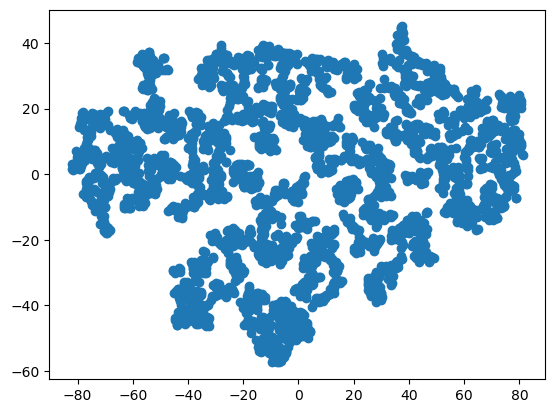

array([[ 21.596287 , -20.662296 ],
       [ 46.00689  , -11.898437 ],
       [-53.93176  ,  19.719254 ],
       ...,
       [ 20.83588  ,  -2.369123 ],
       [  1.3278469,  -6.025722 ],
       [ -1.5826384, -41.8542   ]], dtype=float32)

(array([[0.        , 0.03133426, 0.23342765, 0.43678011, 0.61752871],
        [0.        , 0.03133426, 0.27132574, 0.47642658, 0.64134064],
        [0.        , 0.03727827, 0.27132574, 0.50319425, 0.65323834],
        ...,
        [0.        , 2.32201692, 2.96379492, 3.33707403, 3.58060785],
        [0.        , 2.37566962, 3.14967402, 3.36699202, 3.58509779],
        [0.        , 2.61403638, 3.21812225, 3.39090787, 3.78297001]]),
 array([[0.        , 0.90316032, 1.33191536, 1.5090679 , 1.53793503],
        [0.        , 0.57964806, 0.68388113, 2.71657285, 2.77124015],
        [0.        , 0.76852878, 0.94547439, 1.0265982 , 1.50285901],
        ...,
        [0.        , 0.22991055, 0.96079859, 1.21100966, 1.50412713],
        [0.        , 0.19490352, 1.75449213, 2.16832472, 2.23767746],
        [0.        , 1.0120175 , 1.13919412, 1.27330663, 1.39164307]]),
 array([[   0, 3061, 3032, 3107,  734],
        [   1, 3130, 2770, 1767,  593],
        [   2, 1404, 3045,  516, 1097],
        ..

3.478042152566942


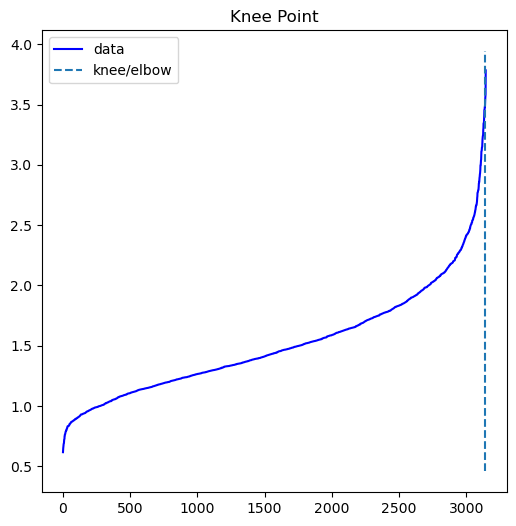

[0 1 2 ... 4 2 5]


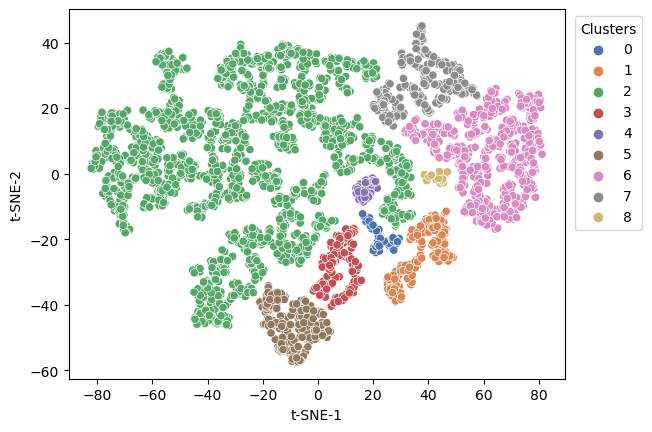

In [47]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

final_log_ss_pca_components = pd.read_csv(repo_pca + 'final_log_ss_pca_components.csv')

tsne_1_log_ss = tsne_(final_log_ss_pca_components)
display(tsne_1_log_ss)

tsne_2_log_ss = NN(tsne_1_log_ss, 5)
display(tsne_2_log_ss)

tsne_3_log_ss = plot_k(tsne_2_log_ss[0], tsne_2_log_ss[1])

tsne_4_log_ss = dbscan_(tsne_3_log_ss, 4, tsne_1_log_ss)

#### T-SNE - final_mm_pca_components

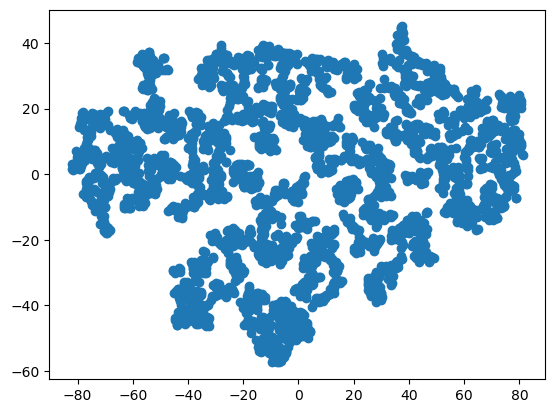

array([[ 21.596287 , -20.662296 ],
       [ 46.00689  , -11.898437 ],
       [-53.93176  ,  19.719254 ],
       ...,
       [ 20.83588  ,  -2.369123 ],
       [  1.3278469,  -6.025722 ],
       [ -1.5826384, -41.8542   ]], dtype=float32)

(array([[0.        , 0.03133426, 0.23342765, 0.43678011, 0.61752871],
        [0.        , 0.03133426, 0.27132574, 0.47642658, 0.64134064],
        [0.        , 0.03727827, 0.27132574, 0.50319425, 0.65323834],
        ...,
        [0.        , 2.32201692, 2.96379492, 3.33707403, 3.58060785],
        [0.        , 2.37566962, 3.14967402, 3.36699202, 3.58509779],
        [0.        , 2.61403638, 3.21812225, 3.39090787, 3.78297001]]),
 array([[0.        , 0.90316032, 1.33191536, 1.5090679 , 1.53793503],
        [0.        , 0.57964806, 0.68388113, 2.71657285, 2.77124015],
        [0.        , 0.76852878, 0.94547439, 1.0265982 , 1.50285901],
        ...,
        [0.        , 0.22991055, 0.96079859, 1.21100966, 1.50412713],
        [0.        , 0.19490352, 1.75449213, 2.16832472, 2.23767746],
        [0.        , 1.0120175 , 1.13919412, 1.27330663, 1.39164307]]),
 array([[   0, 3061, 3032, 3107,  734],
        [   1, 3130, 2770, 1767,  593],
        [   2, 1404, 3045,  516, 1097],
        ..

3.478042152566942


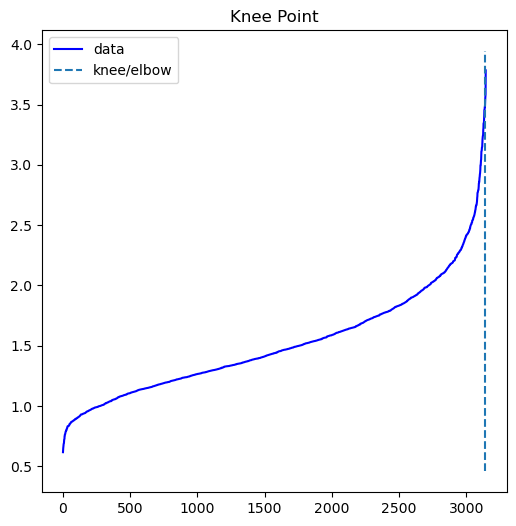

[0 1 2 ... 4 2 5]


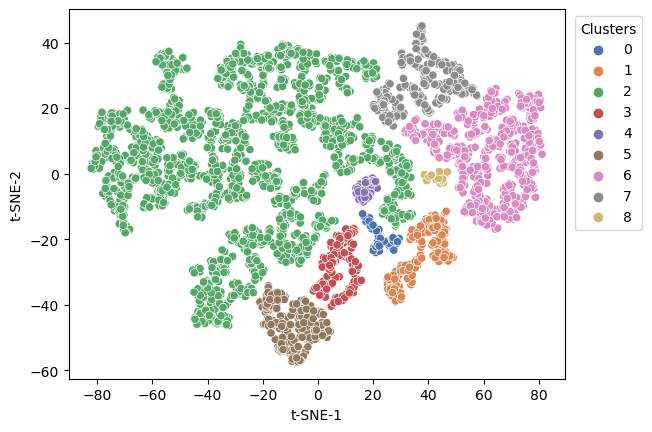

In [48]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

final_mm_pca_components = pd.read_csv(repo_pca + 'final_mm_pca_components.csv')

tsne_1_mm = tsne_(final_mm_pca_components)
display(tsne_1_mm)

tsne_2_mm = NN(tsne_1_mm, 5)
display(tsne_2_mm)

tsne_3_mm = plot_k(tsne_2_mm[0], tsne_2_mm[1])

tsne_4_mm = dbscan_(tsne_3_mm, 4, tsne_1_mm)

#### T-SNE - final_ss_pca_components

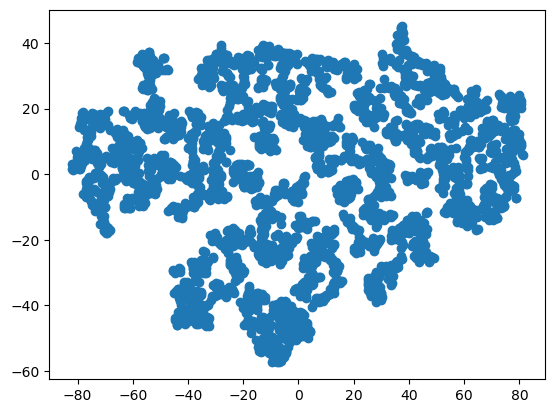

array([[ 21.596287 , -20.662296 ],
       [ 46.00689  , -11.898437 ],
       [-53.93176  ,  19.719254 ],
       ...,
       [ 20.83588  ,  -2.369123 ],
       [  1.3278469,  -6.025722 ],
       [ -1.5826384, -41.8542   ]], dtype=float32)

(array([[0.        , 0.03133426, 0.23342765, 0.43678011, 0.61752871],
        [0.        , 0.03133426, 0.27132574, 0.47642658, 0.64134064],
        [0.        , 0.03727827, 0.27132574, 0.50319425, 0.65323834],
        ...,
        [0.        , 2.32201692, 2.96379492, 3.33707403, 3.58060785],
        [0.        , 2.37566962, 3.14967402, 3.36699202, 3.58509779],
        [0.        , 2.61403638, 3.21812225, 3.39090787, 3.78297001]]),
 array([[0.        , 0.90316032, 1.33191536, 1.5090679 , 1.53793503],
        [0.        , 0.57964806, 0.68388113, 2.71657285, 2.77124015],
        [0.        , 0.76852878, 0.94547439, 1.0265982 , 1.50285901],
        ...,
        [0.        , 0.22991055, 0.96079859, 1.21100966, 1.50412713],
        [0.        , 0.19490352, 1.75449213, 2.16832472, 2.23767746],
        [0.        , 1.0120175 , 1.13919412, 1.27330663, 1.39164307]]),
 array([[   0, 3061, 3032, 3107,  734],
        [   1, 3130, 2770, 1767,  593],
        [   2, 1404, 3045,  516, 1097],
        ..

3.478042152566942


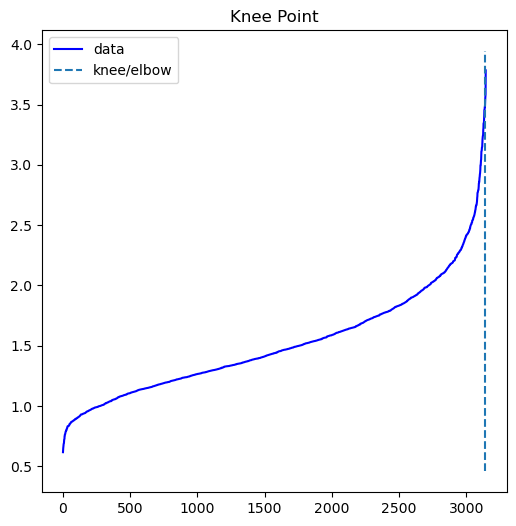

[0 1 2 ... 4 2 5]


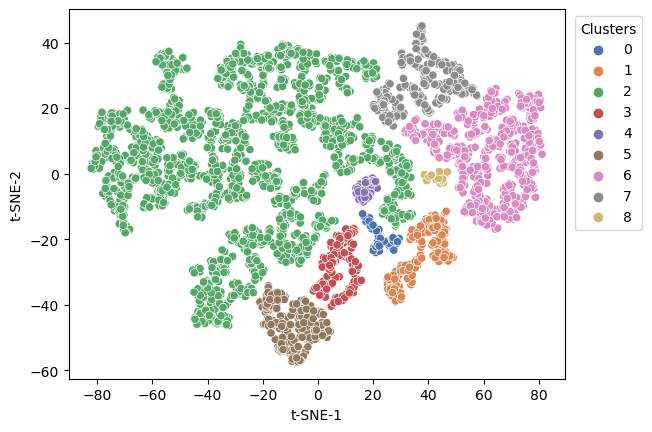

In [49]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

final_ss_pca_components = pd.read_csv(repo_pca + 'final_ss_pca_components.csv')

tsne_1_ss = tsne_(final_ss_pca_components)
display(tsne_1_ss)

tsne_2_ss = NN(tsne_1_ss, 5)
display(tsne_2_ss)

tsne_3_ss = plot_k(tsne_2_ss[0], tsne_2_ss[1])

tsne_4_ss = dbscan_(tsne_3_ss, 4, tsne_1_ss)

### DBScan Clusters

In [51]:
repo_d = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/'

final_data = pd.read_csv(repo_d + 'final_data.csv')

final_data = final_data.join(tsne_4_log_mm.rename(columns={'label':'final_log_mm_db'})) \
                       .join(tsne_4_log_ss.rename(columns={'label':'final_log_ss_db'})) \
                       .join(tsne_4_mm.rename(columns={'label':'final_mm_db'}))         \
                       .join(tsne_4_ss.rename(columns={'label':'final_ss_db'}))

final_data
#final_data.to_csv(r'C:\Users\Mattl\Desktop\Data\final\final_data_segmented.csv', index = False)

,fips,county_name,state,attained_bachelors,attained_doctorate,attained_masters,attained_professional,black,black_homeowners,eight_rooms,...,house_price_avg_q1_2022,house_price_avg_q2_2022,house_price_avg_q3_2022,house_price_avg_q4_2022,house_price_avg_q1_2023,house_price_avg_2022,final_log_mm_db,final_log_ss_db,final_mm_db,final_ss_db
0,1001,Autauga County,Alabama,0.164260,0.011713,0.092114,0.013228,0.196844,0.560549,0.104427,...,2.057201e+05,2.134948e+05,2.179221e+05,2.186639e+05,2.216174e+05,2.139502e+05,0,0,0,0
1,1003,Baldwin County,Alabama,0.206072,0.013829,0.085716,0.018885,0.086950,0.628894,0.097632,...,3.280500e+05,3.437913e+05,3.526471e+05,3.535281e+05,3.538124e+05,3.445041e+05,1,1,1,1
2,1005,Barbour County,Alabama,0.067352,0.006168,0.028897,0.009114,0.472465,0.540083,0.059827,...,1.207824e+05,1.209975e+05,1.239684e+05,1.234504e+05,1.285342e+05,1.222997e+05,2,2,2,2
3,1007,Bibb County,Alabama,0.079467,0.004235,0.029644,0.005792,0.218856,0.597826,0.070010,...,1.576830e+05,1.616551e+05,1.662108e+05,1.652471e+05,1.700634e+05,1.626990e+05,2,2,2,2
4,1009,Blount County,Alabama,0.093022,0.004426,0.044556,0.007033,0.012669,0.890756,0.097077,...,1.870102e+05,1.960095e+05,1.994517e+05,1.985796e+05,2.040660e+05,1.952627e+05,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,Sweetwater County,Wyoming,0.124101,0.008125,0.046017,0.015674,0.011281,0.454545,0.083029,...,2.398096e+05,2.438263e+05,2.467218e+05,2.487840e+05,2.521160e+05,2.447855e+05,7,7,7,7
3139,56039,Teton County,Wyoming,0.382694,0.020896,0.147007,0.028088,0.007119,0.000000,0.064127,...,1.450559e+06,1.558608e+06,1.554250e+06,1.562388e+06,1.638108e+06,1.531451e+06,6,6,6,6
3140,56041,Uinta County,Wyoming,0.123177,0.005894,0.042847,0.007632,0.002535,0.275862,0.118608,...,2.584387e+05,2.730796e+05,2.818010e+05,2.852360e+05,2.877270e+05,2.746388e+05,4,4,4,4
3141,56043,Washakie County,Wyoming,0.172414,0.003319,0.072100,0.013830,0.000129,NaN,0.136648,...,2.140023e+05,2.218298e+05,2.272008e+05,2.301036e+05,2.342385e+05,2.232841e+05,2,2,2,2


### 1. tSNE

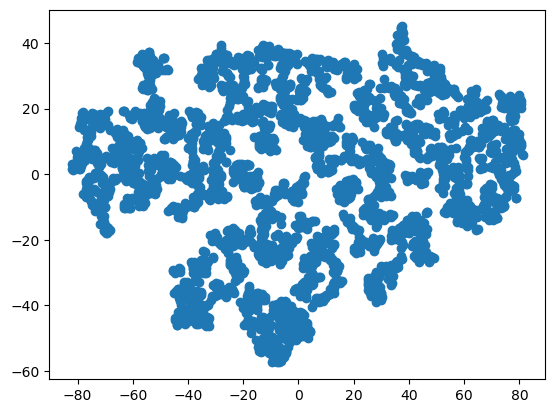

In [31]:
from sklearn.manifold import TSNE

#repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

#final_log_mm_pca_components = pd.read_csv(repo_pca + 'final_log_mm_pca_components.csv')

# grabs only first 3 components
X = final_log_mm_pca_components.iloc[:, :3].values 

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])#, c=y, cmap=plt.cm.get_cmap('jet', 10))
#plt.colorbar(ticks=range(10))

plt.show()

### 2. dbscan

In [32]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(X_tsne)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_tsne)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

3.478042152566942


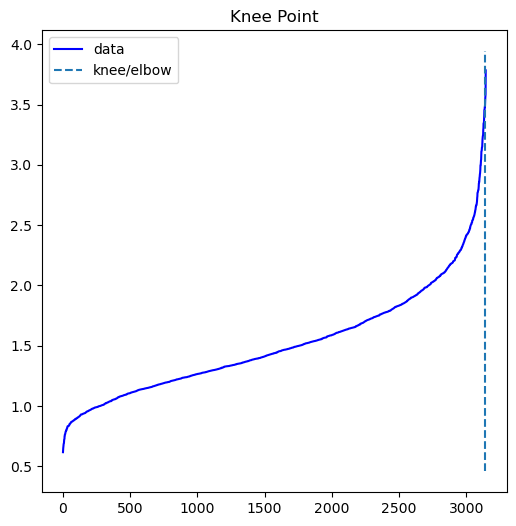

In [33]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

print(kneedle.knee_y)

kneedle.plot_knee()
plt.show()

In [34]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 3.48, min_samples = 4).fit(X_tsne)
# get cluster labels
print(clusters.labels_)

# check unique clusters
set(clusters.labels_)
# -1 value represents noisy points could not assigned to any cluster
from collections import Counter
Counter(clusters.labels_)

[0 1 2 ... 4 2 5]


Counter({0: 43, 1: 156, 2: 1806, 3: 126, 4: 40, 5: 197, 6: 523, 7: 226, 8: 26})

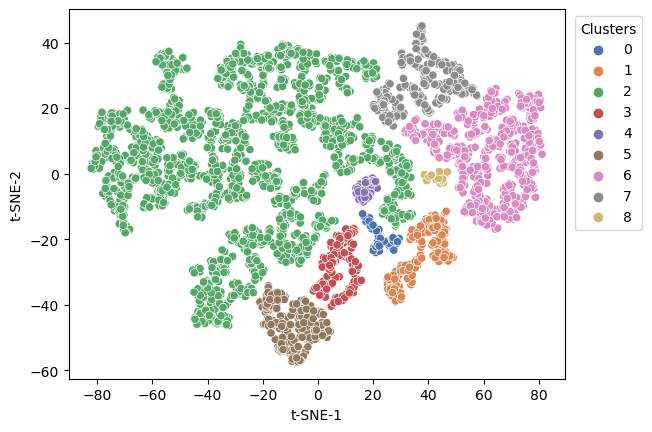

,t-SNE-1,t-SNE-2
0,21.596287,-20.662296
1,46.006889,-11.898437
2,-53.931759,19.719254
3,-20.583281,-21.694691
4,4.314786,-25.047922
...,...,...
3138,25.495613,15.799693
3139,80.116730,21.781708
3140,20.835880,-2.369123
3141,1.327847,-6.025722


In [36]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data= X_tsne,columns=['t-SNE-1','t-SNE-2']) 

p = sns.scatterplot(data = df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

df

halanopis distance

https://www.analyticsvidhya.com/blog/2020/10/reduce-the-complexity-of-you-data-with-variable-clustering-from-scratch-using-sas-and-python/
group variables into classes and pick one class.

Variable Clustering  --> 

# Nearest Neighbors

In [36]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(components)
distances, indices = nbrs.kneighbors(components)
print(f'Distances:\n{distances}\n\nIndices:\n{indices}')

Distances:
[[0.         0.15112035]
 [0.         0.05412471]
 [0.         0.17150628]
 ...
 [0.         0.22317987]
 [0.         0.17464636]
 [0.         0.20337661]]

Indices:
[[   0 2176]
 [   1 3002]
 [   2 1263]
 ...
 [3218 2039]
 [3219   70]
 [3220  967]]


# Plotting K-Distance
Finds value of epsilon

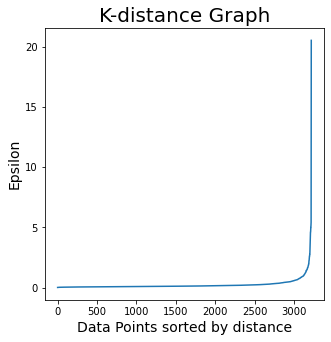

In [37]:
%matplotlib inline

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

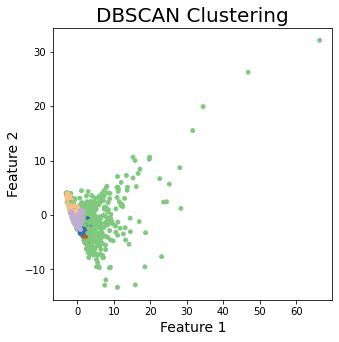

In [29]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(components)

components['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(components['PC1'],components['PC2'],c=components['DBSCAN_labels'],cmap='Accent',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# K-Means

In [4]:
from sklearn.cluster import KMeans

def kmeans_elbow(X):
    wcss=[]
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
    plt.xlabel('K Value')
    plt.ylabel('WCSS')
    return plt.show()

In [5]:
def kmeans_cluster(df, X):
    tmp      = df
    kmeans   = KMeans(n_clusters = 5)
    clusters = kmeans.fit_predict(X)
    tmp['label'] = clusters
    return tmp

In [6]:
#%pylab
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def plot_k(df): 
   
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['PC1'][df.label == 0], df['PC2'][df.label == 0],df['PC3'][df.label == 0],c='blue', s=20, label = '0')
    ax.scatter(df['PC1'][df.label == 1], df['PC2'][df.label == 1],df['PC3'][df.label == 1],c='red', s=20, label = '1')
    ax.scatter(df['PC1'][df.label == 2], df['PC2'][df.label == 2],df['PC3'][df.label == 2],c='green', s=20, label = '2')
    ax.scatter(df['PC1'][df.label == 3], df['PC2'][df.label == 3],df['PC3'][df.label == 3],c='orange', s=20, label = '3')
    ax.scatter(df['PC1'][df.label == 4], df['PC2'][df.label == 4],df['PC3'][df.label == 4],c='purple', s=20, label = '4')
    ax.view_init(30,120)

    ### CHECK/ VALIDATE THESE!!!!
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend(loc="upper right")


    plt.show()

# K-Means

### final mm log pca 

In [7]:
%pylab
#%matplotlib inline

repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

final_log_mm_pca_components = pd.read_csv(repo_pca + 'final_log_mm_pca_components.csv')

# grabs only first 3 components
X = final_log_mm_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

# k-mean algo
final_log_mm_pca_components = kmeans_cluster(final_log_mm_pca_components, X)
display(final_log_mm_pca_components)

# plot k-means
plot_k(final_log_mm_pca_components)

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,1.660468,-2.527098,-1.279068,-0.923121,2.182852,1.291934,-4.031925,1.537073,2.202677,1.047665,1
1,5.851065,-0.870448,-0.196122,0.173983,-0.375883,0.269863,-5.575227,1.559633,2.526158,0.864680,1
2,-5.325445,2.510663,-1.206219,-1.007899,1.987087,2.982639,-3.449843,1.023620,1.416779,0.670919,4
3,-2.508568,-1.211067,0.763118,-2.890163,1.647063,-1.397221,-4.324518,1.361861,4.724699,-0.618306,0
4,0.008062,-2.242699,-0.440432,-1.470020,0.955239,0.559951,-4.578838,2.312122,3.494554,0.271977,0
...,...,...,...,...,...,...,...,...,...,...,...
3138,2.239572,0.753930,0.727520,-2.384275,-0.215225,-0.864198,2.069560,0.234832,-2.877151,0.674932,1
3139,19.362629,2.793661,4.093737,-0.353082,-1.919528,-0.700541,-0.621765,-1.806246,-1.881853,1.772886,2
3140,3.157844,0.237973,1.090901,-0.462999,-0.860216,-1.452043,1.172930,0.552608,-2.331710,-1.179693,1
3141,1.226776,-0.536626,1.194127,-0.059504,-2.250850,0.607381,2.616718,0.734779,-1.508952,-1.571377,1


### final_log_ss_pca_components

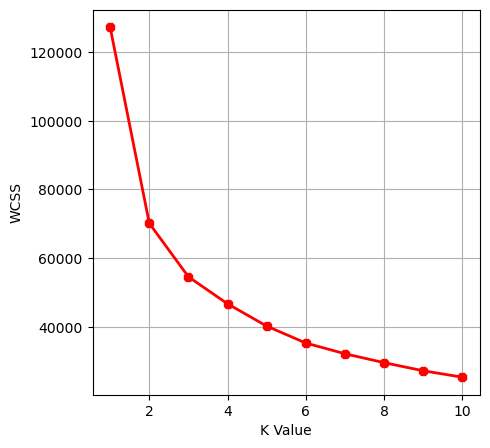

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,1.660469,-2.527219,-1.279756,-0.921698,2.194312,1.274863,-4.052467,1.507333,2.185395,1.162364,4
1,5.851066,-0.870683,-0.196300,0.175432,-0.363719,0.268944,-5.596244,1.515749,2.513462,0.898232,4
2,-5.325446,2.510645,-1.205172,-1.003572,2.006779,2.949020,-3.467124,0.983230,1.350663,0.684985,0
3,-2.508569,-1.210542,0.762052,-2.890461,1.633963,-1.392403,-4.292566,1.376218,4.796405,-0.179038,3
4,0.008061,-2.242632,-0.439160,-1.468019,0.962936,0.559106,-4.570109,2.286133,3.487485,0.340555,3
...,...,...,...,...,...,...,...,...,...,...,...
3138,2.239571,0.754145,0.726890,-2.383211,-0.209434,-0.876689,2.041849,0.224537,-2.898326,0.848999,4
3139,19.362630,2.793439,4.094681,-0.354533,-1.916007,-0.689080,-0.633031,-1.809538,-1.885569,1.585192,2
3140,3.157844,0.237874,1.090586,-0.461521,-0.859040,-1.446416,1.161506,0.538171,-2.348019,-1.337780,4
3141,1.226774,-0.536320,1.193116,-0.057234,-2.249392,0.589075,2.601321,0.740662,-1.535491,-1.473987,4


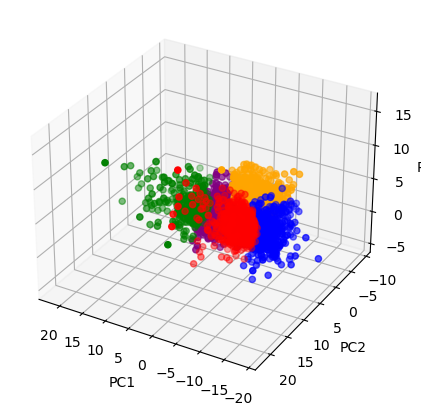

In [22]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

final_log_ss_pca_components = pd.read_csv(repo_pca + 'final_log_ss_pca_components.csv')

# grabs only first 3 components
X = final_log_ss_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

#%pylab
# k-mean algo
final_log_ss_pca_components = kmeans_cluster(final_log_ss_pca_components, X)
display(final_log_ss_pca_components)

# plot k-means
plot_k(final_log_ss_pca_components)

### final_mm_pca_components

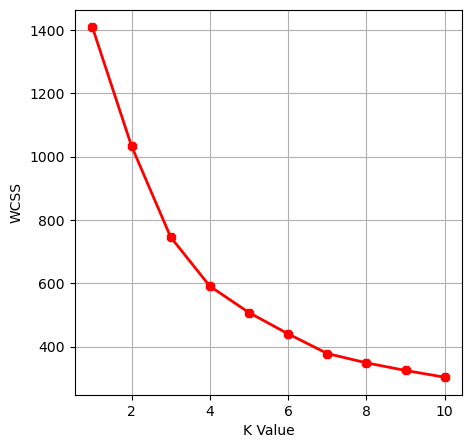

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,-0.006743,0.761303,-0.169529,-0.347725,0.376384,-0.216020,0.051978,-0.069760,0.070956,0.040577,2
1,0.277724,0.755387,-0.173400,-0.288872,0.405251,0.145049,0.138872,-0.185394,0.150388,0.122433,2
2,-0.474084,0.822844,-0.238757,0.166037,0.473877,-0.197720,-0.089434,0.197352,0.003984,0.196889,2
3,-0.340812,0.770960,-0.199625,-0.215519,0.361137,-0.076386,0.129380,-0.001827,0.155645,0.032375,2
4,-0.188344,0.745352,-0.396929,-0.470065,0.300661,0.089085,0.115730,-0.053319,-0.031897,-0.012037,2
...,...,...,...,...,...,...,...,...,...,...,...
3138,0.168222,-0.691303,0.000567,0.207846,-0.338312,0.025151,0.310151,0.086357,-0.322476,-0.300876,1
3139,2.592199,-0.570520,0.211886,0.514354,-0.216438,0.356446,0.313780,0.661025,0.529105,0.251062,0
3140,0.212962,-0.694632,0.149199,0.101067,-0.387988,0.062532,-0.033333,-0.054179,-0.146897,-0.155033,1
3141,0.098393,-0.706051,0.385624,0.080255,-0.428954,-0.015132,-0.162307,0.027714,-0.068563,-0.086112,1


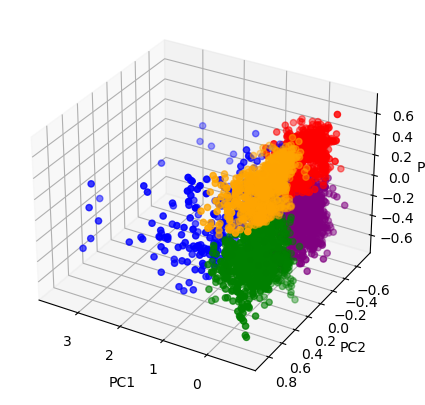

In [23]:
#%pylab

repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

final_mm_pca_components = pd.read_csv(repo_pca + 'final_mm_pca_components.csv')

# grabs only first 3 components
X = final_mm_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

# k-mean algo
final_mm_pca_components = kmeans_cluster(final_mm_pca_components, X)
display(final_mm_pca_components)

# plot k-means
plot_k(final_mm_pca_components)

### final_ss_pca_components

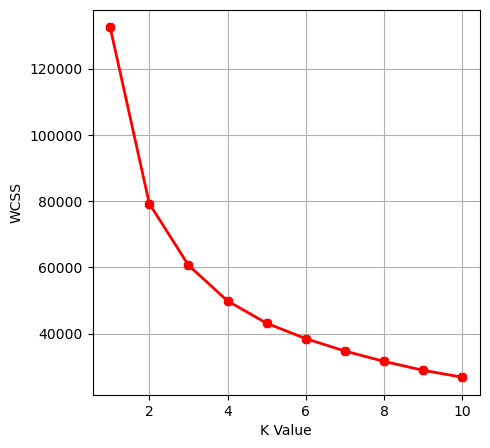

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,-0.076501,-3.059810,0.090842,-0.699058,0.856580,-1.632674,1.148285,2.087619,0.213048,1.427409,0
1,4.147773,-1.597402,0.582582,0.481670,-1.462057,-2.390859,-0.572217,3.185860,0.116236,1.617886,2
2,-4.411260,2.178462,-0.421870,-0.663615,1.039937,-3.040432,2.074661,0.784140,-0.225345,0.889466,3
3,-3.135920,-1.228670,2.899730,-1.345012,1.141766,-2.038981,0.799491,2.996257,0.679880,1.029809,0
4,-1.514106,-2.463715,1.321503,-0.384232,-0.072878,-1.381097,1.141070,2.685185,0.871908,0.561495,0
...,...,...,...,...,...,...,...,...,...,...,...
3138,1.033534,0.576685,1.519256,0.922517,2.113226,2.685221,-2.490818,-2.208026,-0.251260,-1.586491,2
3139,38.556644,4.406690,8.833808,2.083937,-1.784365,-3.446595,-0.228121,-0.807180,0.535838,-3.624347,4
3140,2.045190,-0.347604,-0.322378,0.232170,0.204722,2.152553,-1.362388,-0.633770,0.395880,-3.219385,2
3141,0.099691,-0.700279,-0.413116,0.517468,-1.185090,1.906408,-0.693856,-1.921604,-0.043665,-2.356986,0


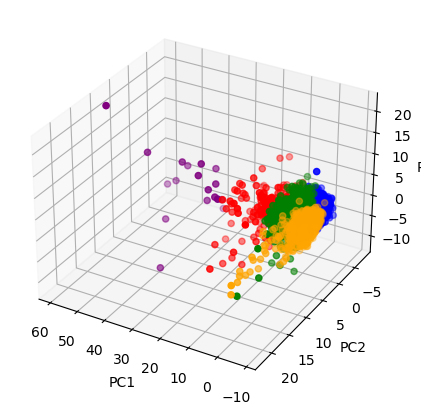

In [24]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

final_ss_pca_components = pd.read_csv(repo_pca + 'final_ss_pca_components.csv')

# grabs only first 3 components
X = final_ss_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

#%pylab
# k-mean algo
final_ss_pca_components = kmeans_cluster(final_ss_pca_components, X)
display(final_ss_pca_components)

# plot k-means
plot_k(final_ss_pca_components)

### census_mm_pca_components

In [7]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

census_mm_pca_components  = pd.read_csv(repo_pca + 'census_mm_pca_components.csv')

# grabs only first 3 components
X = census_mm_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

#%pylab
# k-mean algo
census_mm_pca_components = kmeans_cluster(census_mm_pca_components, X)
display(census_mm_pca_components)

# plot k-means
plot_k(census_mm_pca_components)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,0.074415,0.072795,-0.073199,-0.062028,0.026706,0.037905,0.048681,0.007789,0.006076,-0.006096,0
1,-0.064006,-0.056418,-0.105185,-0.004692,-0.071091,-0.032431,-0.019631,0.005956,0.038748,0.009590,4
2,0.133728,-0.055680,-0.034247,-0.034577,0.158417,-0.049024,-0.038093,-0.020549,0.008943,0.001166,0
3,-0.050600,-0.068836,0.011464,-0.012357,-0.074325,-0.140557,-0.056074,0.010950,0.024716,0.009990,4
4,0.013167,-0.117199,-0.069830,0.023085,0.002655,-0.033732,-0.014569,0.033979,-0.001900,0.001083,4
...,...,...,...,...,...,...,...,...,...,...,...
3216,0.070424,-0.005995,-0.039615,-0.055676,0.031370,0.052732,-0.053833,0.048348,0.018719,-0.006217,0
3217,-0.263566,0.076393,0.002725,-0.008141,0.011324,-0.115794,0.046044,0.016815,-0.050031,0.006351,1
3218,0.038189,0.008645,-0.014161,0.004233,-0.004891,0.018897,0.075353,-0.043897,-0.004598,-0.006625,0
3219,0.157235,-0.075680,0.009383,0.017310,-0.066877,-0.015453,-0.011125,-0.003909,0.014601,-0.010933,0


Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### census_ss_pca_components

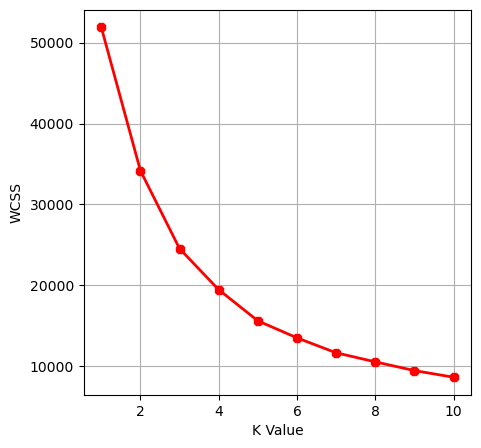

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,0.243359,-0.621418,-0.538516,1.246014,-0.277606,0.219000,-0.193943,0.051073,-0.295182,-0.439523,1
1,-1.165074,-0.117813,1.159597,0.196994,-0.315853,0.554158,0.778354,0.273452,0.322237,-0.024934,1
2,0.241616,-1.883425,-0.021386,1.235618,0.495976,-0.976336,-0.661817,0.135262,0.126840,0.903099,1
3,-0.943044,-0.399704,0.326186,-1.100907,-0.135787,0.409427,1.009432,0.881445,0.686204,0.916943,1
4,-0.699336,-0.838264,1.388388,0.064971,-0.072504,-0.166456,0.315149,0.300240,0.236530,0.328140,1
...,...,...,...,...,...,...,...,...,...,...,...
3216,-0.171748,-1.193146,0.127045,0.681341,-0.044054,0.044371,0.087857,-0.914536,0.438892,0.132418,1
3217,-1.900711,1.731057,-0.857641,0.031207,-0.192980,-0.029414,0.326221,1.463281,0.068664,0.588262,4
3218,0.207718,0.006282,-0.152389,0.238760,-0.055145,0.034441,-0.465426,0.461660,-0.615429,-0.673472,1
3219,1.085174,-1.119618,0.649589,-0.894296,-0.310743,0.292584,0.145819,0.114085,0.145128,-0.095477,1


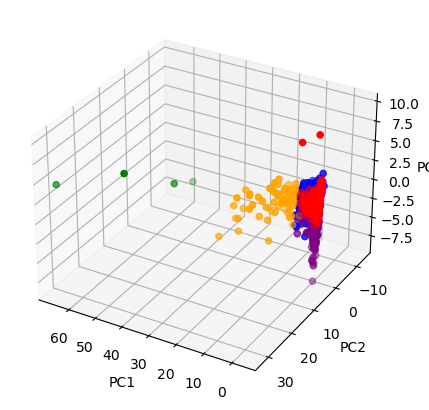

In [32]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

census_ss_pca_components  = pd.read_csv(repo_pca + 'census_ss_pca_components.csv')

# grabs only first 3 components
X = census_ss_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

# k-mean algo
census_ss_pca_components = kmeans_cluster(census_ss_pca_components, X)
display(census_ss_pca_components)

# plot k-means
plot_k(census_ss_pca_components)

# redfin_mm_pca_components

In [9]:
#%pylab

repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

redfin_mm_pca_components  = pd.read_csv(repo_pca + 'redfin_mm_pca_components.csv')

# grabs only first 3 components
X = redfin_mm_pca_components.iloc[:, :3].values 

# elbow curve
kmeans_elbow(X)

# k-mean algo
redfin_mm_pca_components = kmeans_cluster(redfin_mm_pca_components, X)
display(redfin_mm_pca_components)

# plot k-means
plot_k(redfin_mm_pca_components)

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,0.317161,-0.705557,0.078961,-0.458155,-0.005652,-0.183930,0.072187,0.011991,0.047950,-0.015377,0
1,-0.402436,0.720347,0.305065,-0.555383,0.288389,0.206303,-0.147651,-0.091832,-0.093610,-0.189539,2
2,0.822845,0.178027,0.165394,0.107567,0.097006,-0.170268,0.036374,-0.686669,0.370964,-0.044032,1
3,0.089343,-0.403640,0.376551,-0.166206,0.281799,-0.353378,0.228585,0.127541,0.112350,-0.014517,0
4,-0.137056,-0.293213,0.131889,-0.202973,-0.116096,-0.725526,-0.496865,-0.128934,-0.450441,0.826003,0
...,...,...,...,...,...,...,...,...,...,...,...
48844,-0.226598,-0.463080,-0.466169,-0.193632,0.360977,0.116376,-0.087674,-0.179201,-0.183078,0.004987,4
48845,-0.145188,-0.320460,0.422156,-0.477309,-0.267527,0.379760,-0.325754,-0.016724,0.053705,-0.032353,0
48846,-0.352000,-0.518394,-0.418067,-0.407144,-0.343553,0.535729,0.135822,0.038258,0.090829,0.056035,4
48847,-0.050212,-0.311397,0.932897,-0.454196,-0.329548,0.523813,0.114245,0.068765,0.115527,-0.110593,0


### redfin_ss_pca_components

In [8]:
repo_pca = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/principal_components/'

redfin_ss_pca_components  = pd.read_csv(repo_pca + 'redfin_ss_pca_components.csv')

# grabs only first 3 components
X = redfin_ss_pca_components.iloc[:, :3].values 
%pylab
# elbow curve
kmeans_elbow(X)

# k-mean algo
redfin_ss_pca_components = kmeans_cluster(redfin_ss_pca_components, X)
display(redfin_ss_pca_components)

# plot k-means
plot_k(redfin_ss_pca_components)

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,0.524233,-2.559521,0.459837,-0.508818,0.592072,-1.313750,0.040855,0.115808,0.306844,1.413510,0
1,-1.800326,1.902161,-1.878670,-1.159380,-0.056371,0.757488,-1.114266,0.266332,0.200666,1.431240,2
2,-0.848712,-0.798932,-0.700922,-0.137733,0.018784,-0.147573,-1.250733,-0.953146,0.275758,0.033908,0
3,-0.228148,-1.322640,0.745922,0.243030,-0.464482,0.002496,-1.335928,0.373192,0.007066,0.270195,0
4,0.209352,0.856788,5.661612,1.655823,-4.100012,2.775485,0.312861,-0.535592,-0.431051,1.567258,3
...,...,...,...,...,...,...,...,...,...,...,...
48844,0.069587,-1.286599,-0.627121,2.895637,-0.552821,0.790298,1.598922,0.232716,0.032409,1.663148,0
48845,0.080806,-1.061991,-0.163504,-0.263491,-0.206887,0.311081,-1.269822,-0.539958,0.069568,-0.075491,0
48846,1.576881,-0.845751,-1.081923,0.446629,-1.490457,-0.317520,0.323457,-0.242233,-0.124137,-0.775330,0
48847,-0.552962,-1.946329,-1.236244,-0.261230,1.557373,0.517040,-2.599553,-1.253377,0.420483,-0.674546,0


# Merge Results onto original datasets

Final Merge

In [26]:
repo_d = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/'

final_data = pd.read_csv(repo_d + 'final_data.csv')

final_data = final_data.join(final_log_mm_pca_components[['label']].rename(columns={'label':'final_log_mm_k'})) \
                       .join(final_log_ss_pca_components[['label']].rename(columns={'label':'final_log_ss_k'})) \
                       .join(final_mm_pca_components[['label']].rename(columns={'label':'final_mm_k'}))         \
                       .join(final_ss_pca_components[['label']].rename(columns={'label':'final_ss_k'}))

final_data.to_csv(r'C:\Users\Mattl\Desktop\Data\final\final_data_segmented.csv', index = False)

Census Merge

In [49]:
census_data = pd.read_csv(repo_d + 'census.csv')

census_clusters = census_data[['GEOID']]                                               \
    .join(census_ss_pca_components[['label']].rename(columns={'label':'census_ss_k'})) \
    .join(census_mm_pca_components[['label']].rename(columns={'label':'census_mm_k'}))

census_clusters

#census_clusters.to_csv(r'C:\Users\Mattl\Desktop\Data\census_clusters.csv',index=False)

,GEOID,census_ss_k,census_mm_k
0,20161,1,3
1,19159,1,1
2,30009,1,3
3,16007,1,1
4,55011,1,1
...,...,...,...
3216,53003,1,3
3217,13043,4,2
3218,48451,1,3
3219,39089,1,3


Redfin Merge

In [48]:
# redfin_data = pd.read_csv(repo_d + 'redfin.csv')

# redfin_data[['GEOID']]                                                                 \
#     .join(redfin_ss_pca_components[['label']].rename(columns={'label':'redfin_ss_k'})) \
#     .join(redfin_mm_pca_components[['label']].rename(columns={'label':'redfin_mm_k'}))